(pvt-esc-rr-2p)=
# Уравнение Речфорда-Райса для двухфазных систем

В предыдущем [разделе](SEC-2-RR.md) был представлен вывод уравнения Речфорда-Райса (уравнения фазовых концентраций). Данный раздел посвящен подходам к решению данного уравнения для двухфазных систем.

Рассмотрим двухфазную систему. Для такого случая уравнение Речфорда-Райса записывается следующим образом:

$$ R \left( F \right) = \sum_{i=1}^{N_c} \frac{y_i \left( K_i - 1 \right)}{ F \left( K_i - 1 \right) + 1} = 0, $$

где $F$ – мольная доля нереференсной фазы, $y_i$ – мольная доля компонента в системе, $N_c$ – количество компонентов в системе, $K_i$ – константа фазового равновесия (отношение мольной доли компонента в нереференсной фазе к мольной доли этого же компонента в референсной).

С математической точки зрения уравнение Речфорда-Райса представляет собой сумму гипербол, поэтому наличие точки перегиба, то есть невыпуклый вид функции, осложняет применение численных методов для решения данного уравнения. Кроме того, одной из особенностей уравнения Речфорда-Райса является наличие [полюсов](https://en.wikipedia.org/wiki/Zeros_and_poles) в точках, где знаменатель равен нулю:

$$ F \left( K_i - 1 \right) + 1 = 0 \Rightarrow F = -\frac{1}{K_i - 1}, \; i = 1 \, \ldots \, N_c. $$

Для наглядности рассмотрим поведение данного уравнения на следующем примере.

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
import numpy as np
yi = np.array([0.2, 0.4, 0.3, 0.1])
kvi = np.array([5., 1.2, 0.8, 0.2])
```

Необходимо найти мольную долю нереференсной фазы для заданной системы.

````

In [1]:
import numpy as np
yi = np.array([0.2, 0.4, 0.3, 0.1])
kvi = np.array([5., 1.2, 0.8, 0.2])

Построим график функции Речфорда-Райса.

poles = array([-0.25, -5.  ,  5.  ,  1.25])


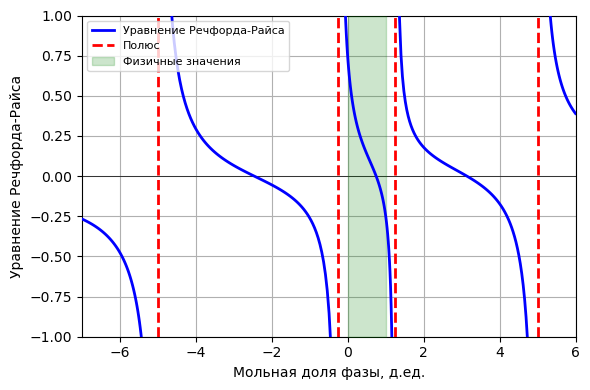

In [2]:
poles = -1. / (kvi - 1.)
print(f'{poles = }')
segments = np.sort(np.append(poles, [-7., 6.]))

from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
eps = 1e-3
for i in range(segments.shape[0] - 1):
    F = np.linspace(segments[i]+eps, segments[i+1]-eps, 100, endpoint=True)
    R = np.sum(yi * (kvi - 1.) / (F[:,None] * (kvi - 1.) + 1), axis=1)
    p1, = ax1.plot(F, R, lw=2., c='b', zorder=4)
for pole in poles:
    p2, = ax1.plot([pole, pole], [-1., 1.], lw=2., ls='--', c='r', zorder=4)
p3 = ax1.fill_betweenx([-1., 1.], 0., 1., color='g', alpha=0.2, zorder=3)
ax1.plot([-7., 6.], [0., 0.], lw=0.5, c='k', zorder=2)
ax1.set_ylim(-1., 1.)
ax1.set_ylabel('Уравнение Речфорда-Райса')
ax1.set_xlim(-7., 6.)
ax1.set_xlabel('Мольная доля фазы, д.ед.')
ax1.legend(
    [p1, p2, p3],
    ['Уравнение Речфорда-Райса', 'Полюс', 'Физичные значения'],
    loc=2,
    fontsize=8
)
ax1.grid(zorder=1)

Анализируя полученные результаты, можно отметить, что помимо корня, находящегося в области физичных значений мольной доли фазы, то есть на отрезке $\left[0, \, 1 \right]$, существуют также и другие корни. Естественно, численные методы решения нелинейных уравнений, применяемые для такого вида функций, не могут гарантировать быстрый и надежный поиск нужного корня, поэтому прежде чем переходить к рассмотрению алгоритмов решения уравнения Речфорда-Райса для двухфазных систем, необходимо выполнить ряд преобразований, позволяющих видоизменить функцию для получения выпуклого вида.

Прежде всего, необходимо отметить, что у данной задачи есть несколько подходов к решению. Одним из таких подходов является выбор в качестве основной переменной мольной доли компонента в некоторой фазе, а не мольной доли фазы. Согласно \[[Wang and Orr, 1997](https://doi.org/10.1016/S0378-3812(97)00179-9)\], мольная доля фазы может принимать различные значения при решении уравнения Речфорда-Райса (что продемонстрировано на рисунке выше), в то время как мольные доли компонентов в фазах ограничены отрезком от нуля до единицы. Другой подход, изложенный в работе \[[Leibovici and Neoschil, 1992](https://doi.org/10.1016/0378-3812(92)85069-K)\], основан на преобразовании уравнения Речфорда-Райса, позволяющему сделать функцию более линейной в определенном интервале, содержащем корень. Третий подход предполагает выбор других основных переменных (количества вещества компонентов в фазах) для нахождения равновесного состония, позволяющий вообще убрать необходимость решения уравнения Речфорда-Райса, однако об этом речь пойдет в [разделе](SEC-5-Equilibrium.md), посвященном  определению равновесного состояния. Подход к решению уравнения Речфорда-Райса, представленный далее, основан на работах \[[Nichita and Leibovici, 2013](https://doi.org/10.1016/j.fluid.2013.05.030)\], \[[Nichita and Leibovici, 2017](https://doi.org/10.1016/j.fluid.2017.08.020)\]. Стоит отметить, что существуют и другие работы, посвященные исследованию численных методов решения уравнения Речфорда-Райса в двухфазной постановке, например, \[[Mikyska, 2023](https://doi.org/10.1016/j.fluid.2023.113803); [Li and Johns, 2007](https://doi.org/10.2118/106080-MS); [Juanes, 2008](https://doi.org/10.1016/j.fluid.2008.02.009); [Gaganis et al, 2012](https://doi.org/10.1016/j.fluid.2012.03.001)\] и *многие* другие.

Для начала необходимо описать тот результат, который необходимо получить. Поскольку численные методы решения нелинейных уравнений, в том числе метод Ньютона, показывают свою эффективность для выпуклых функций, а уравнение Речфорда-Райса не является таковым, то необходимо путем замены переменных преобразовать рассматриваемую функцию в выпуклую на интервале, содержащем искомый корень.

Стоит отметить, что для того чтобы уравнение Речфорда-Райса имело хотя бы один корень, необходимо, чтобы хотя бы одно из слагаемых суммы

$$ \sum_{i=1}^{N_c} \frac{y_i \left( K_i - 1 \right)}{ F \left( K_i - 1 \right) + 1} $$

было отрицательным и хотя бы одно было положительным. Это возможно в том случае, если хотя бы одна из констант фазового равновесия будет меньше единицы, и хотя бы одна константа фазового равновесия будет больше единицы. Таким образом, дальнейшее рассмотрение справедливо с учетом сформулированного условия.

Кроме того, ранее было показано, что уравнение Речфорда-Райса имеет $N_c$ асимптот, абсциссы которых описываются выражением:

$$ F = \frac{1}{1 - K_i}, \; i = 1 \, \ldots \, N_c. $$

При этом, для того чтобы мольные доли компонентов в фазах, определяемые выражением:

$$ y_i^R = \frac{y_i}{F \left( K_i - 1 \right) + 1}, \; i = 1 \, \ldots \, N_c, $$

были положительными, необходимо, чтобы было положительным следующее выражение:

$$ F \left( K_i - 1 \right) + 1 > 0, \; i = 1 \, \ldots \, N_c. $$

Пусть $K_1 > K_i > K_{N_c}, \; i = 2 \, \ldots \, N_c-1$, то есть константы фазового равновесия расположены по убыванию, тогда часть из них будет больше единицы, а часть из них меньше. Тогда представленное выше неравенство преобразуется в систему неравенств:

$$ \begin{cases}
F > \frac{1}{1 - K_i}, \; i = 1 \, \ldots \,, \; K_i > 1, \\
F < \frac{1}{1 - K_i}, \; i = \ldots\, N_c, \; K_i < 1.
\end{cases} $$

Ряд, определяемый выражением

$$ \frac{1}{1 - K_i}, \; i = 1 \, \ldots \,, \; K_i > 1, $$

содержит только отрицательные значения, причем наибольшее из них соответствует наибольшей константе фазового равновесия $K_1$. Ряд, определяемый выражением

$$ \frac{1}{1 - K_i}, \; i = \ldots\, N_c, \; K_i < 1, $$

содержит только положительные значения, причем наименьшее из них соответствует наименьшей константе фазового равновесия $K_{N_c}$. Таким образом, диапазон значений:

$$ F \in \left( \frac{1}{1 - K_1}, \, \frac{1}{1 - K_{N_c}} \right) $$

определяет отрезок с необходимым корнем уравнения. Использование данного отрезка вместо отрезка физичных значений $\left[0, \, 1 \right]$ было впервые предложено и обосновано в работе \[[Whitson and Michelsen, 1989](http://doi.org/10.1016/0378-3812(89)80072-X)\] и получило название *negative flash window (NF-window)*.

````{margin}
```{admonition} Дополнительно
:class: note
*Negative flash window* получило такое название, поскольку, в отличие от окна физичных значений мольной доли фазы, то есть $\left( 0; \, 1 \right)$, допускает существование *отрицательных* значений мольных долей фаз. Причем, NF-window может использоваться в качестве своеобразной проверки на стабильность: если для найденного равновесного состояния мольная доля одной из фаз получилась отрицательной, то это нефизично, и следовательно, необходимо рассматривать равновесное состояние с меньшим количеством фаз. Можно предположить, что при проведении предварительного теста на стабильность нет необходимости в использовании NF-window, и можно ограничиться диапазоном физичных значений, однако это предположение некорректно. В процессе поиска равновесного состояния с использованием различных численных методов константы фазового равновесия, переданные в качестве исходной информации для алгоритма решения уравнения Речфорда-Райса, могут характеризоваться решением, находящимся вне диапазона физичных значений, то есть путь поиска равновесного состояния ввиду особенностей численного метода может пролегать (или начинаться) в области NF-window. Поэтому использование NF-window вместо $\left( 0; \, 1 \right)$ делает численные методы поиска равновесного состояния более устойчивыми.
```
````

Теперь перейдем к рассмотрению преобразования функции Речфорда-Райса к выпуклому виду на данном отрезке. Для этого введем следующее обозначение:

$$ c_i = \frac{1}{1 - K_i}, \; i = 1 \, \ldots \, N_c. $$

Тогда уравнение Речфорда-Райса преобразуется к следующему виду:

$$ R \left( F \right) = \sum_{i=1}^{N_c} \frac{y_i}{F - c_i} = 0. $$

А отрезок NF-window:

$$ F \in \left( с_1, \, с_{N_c} \right). $$

Введем новую переменную:

$$ a = \frac{F - c_1}{c_{N_c} - F}. $$

При этом, отрезок NF-window $F \in \left( с_1, \, с_{N_c} \right)$ эквивалентен интервалу $a \in \left(0, \, +\infty \right)$. Уравнение Речфорда-Райса преобразуется следующим образом:

$$ \begin{align}
\sum_{i=1}^{N_c} \frac{y_i}{F - c_i} &= 0, \\
\sum_{i=1}^{N_c} \frac{y_i}{\frac{c_{N_c} a + c_1}{a + 1} - c_i} &= 0, \\
\left( a + 1 \right) \sum_{i=1}^{N_c} \frac{y_i}{c_{N_c} a + c_1 - c_i a - c_i} &= 0, \\
\left( a + 1 \right) \left( \frac{y_1}{\left( c_{N_c} - c_1 \right) a} + \sum_{i=2}^{N_c-1} \frac{y_i}{c_{N_c} a + c_1 - c_i a - c_i} - \frac{y_{N_c}}{c_{N_c} - c_1} \right) &= 0, \\
\left( a + 1 \right) \left( \frac{y_1}{a} + \sum_{i=2}^{N_c-1} \frac{y_i \left( c_{N_c} - c_1 \right)}{\left( c_{N_c} - c_1 + c_1 - c_i \right) a + c_1 - c_i} - y_{N_c} \right) &= 0, \\
\left( a + 1 \right) \left( \frac{y_1}{a} + \sum_{i=2}^{N_c-1} \frac{y_i}{\left( 1 + \frac{c_1 - c_i}{c_{N_c} - c_1} \right) a + \frac{c_1 - c_i}{c_{N_c} - c_1}} - y_{N_c} \right) &= 0.
\end{align} $$

Пусть $d_i = \frac{c_1 - c_i}{c_{N_c} - c_1}, \; i = 2 \, \ldots \, N_c-1$, при этом $d_1 = 0$ и $d_{N_c} = -1$, тогда:

$$ \begin{align}
\left( a + 1 \right) \left( \frac{y_1}{\left( 1 + d_1 \right) a + d_1} + \sum_{i=2}^{N_c-1} \frac{y_i}{\left( 1 + d_i \right) a + d_i} + \frac{y_{N_c}}{\left( 1 + d_{N_c} \right) a + d_{N_c}} \right) &= 0, \\
\left( a + 1 \right) \sum_{i=1}^{N_c} \frac{y_i}{\left( 1 + d_i \right) a + d_i} &= 0.
\end{align} $$

Данная функция имеет асимптоту в точке $a = 0$. Докажем, что полученная функция

$$ G \left( a \right) = \left( a + 1 \right) \sum_{i=1}^{N_c} \frac{y_i}{\left( 1 + d_i \right) a + d_i} $$

является выпуклой на рассматриваемом интервале $a \in \left(0, \, +\infty \right)$. Для этого необходимо доказать, что $\frac{\partial^2 G}{\partial a^2} > 0, \; a \in \left(0, \, +\infty \right)$.

```{admonition} Доказательство
:class: proof
Получим первую производную от $G \left( a \right)$:

$$ \begin{align}
\frac{\partial G}{\partial a}
&= \sum_{i=1}^{N_c} \frac{y_i}{\left( 1 + d_i \right) a + d_i} + \left( a + 1 \right) \sum_{i=1}^{N_c} \frac{y_i \left( d_i + 1 \right)}{\left( \left( 1 + d_i \right) a + d_i \right)^2} \\
&= \sum_{i=1}^{N_c} \frac{y_i \left( \left( 1 + d_i \right) a + d_i - \left( a + 1 \right) \left( d_i + 1 \right) \right)}{\left( \left( 1 + d_i \right) a + d_i \right)^2} \\
&= - \sum_{i=1}^{N_c} \frac{y_i}{\left( \left( 1 + d_i \right) a + d_i \right)^2}.
\end{align} $$

Вторая частная производная функции $G \left( a \right)$ по $a$:

$$ \begin{align}
\frac{\partial^2 G}{\partial a^2}
&= 2 \sum_{i=1}^{N_c} \frac{y_i}{\left( \left( 1 + d_i \right) a + d_i \right)^2} \frac{d_i + 1}{\left( 1 + d_i \right) a + d_i} \\
&= 2 \left( \frac{y_1}{a^3} + \sum_{i=2}^{N_c-1} \frac{y_i}{\left( \left( 1 + d_i \right) a + d_i \right)^2} \frac{1}{a + \frac{d_i}{d_i + 1}} \right).
\end{align} $$

Анализируя данное выражение, можно заключить, что для того чтобы показать, что вторая частная производная функции $G \left( a \right)$ по $a$ больше нуля на интервале $a \in \left(0, \, +\infty \right)$, необходимо доказать следующее неравенство:

$$ \frac{d_i}{d_i + 1} > 0, i = 2 \, \ldots \, N_c - 1. $$

Для этого выполним следующие преобразования:

$$ \frac{d_i}{d_i + 1} = \frac{c_1 - c_i}{c_{N_c} - c_i} = \frac{\left( K_1 - K_i \right) \left( 1 - K_{N_c} \right)}{\left( K_{N_c} - K_i \right) \left( 1 - K_1 \right)}, \; i = 2 \, \ldots \, N_c - 1. $$

Поскольку $\left( K_1 - K_i \right) > 0, \; \left( 1 - K_{N_c} \right) > 0, \; \left( K_{N_c} - K_i \right) < 0, \; \left( 1 - K_1 \right) < 0$, то:

$$ \frac{d_i}{d_i + 1} > 0, i = 2 \, \ldots \, N_c - 1. $$

Следовательно, вторая частная производная функции $G \left( a \right)$ по $a$ больше нуля на интервале $a \in \left(0, \, +\infty \right)$, и функция $G \left( a \right)$ является выпуклой на этом интервале.
```

Построим график функции $G \left( a \right)$ для рассматриваемых коэффициентов фазового равновесия:

Для начала рассчитаем значения коэффициентов $c_i$ и $d_i$:

In [3]:
ci = 1. / (1. - kvi)
ci

array([-0.25, -5.  ,  5.  ,  1.25])

In [4]:
di = np.hstack([0., (ci[0] - ci[1:-1]) / (ci[-1] - ci[0]), -1.])
di

array([ 0.        ,  3.16666667, -3.5       , -1.        ])

Построим график функции $G \left( a \right)$

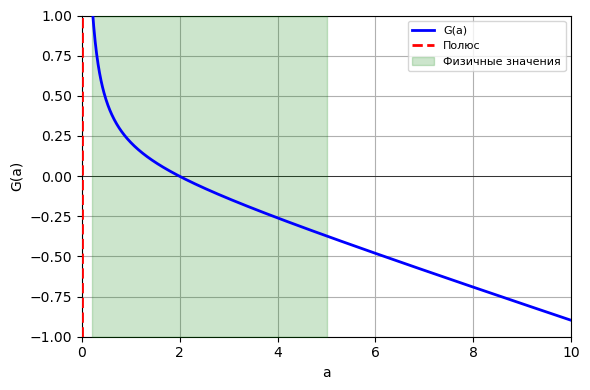

In [5]:
a = np.linspace(1e-3, 10., 1000, endpoint=True)
G = (a + 1.) * np.sum(yi / (a[:,None] * (di + 1) + di), axis=1)
fig2, ax2 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax2.plot(a, G, lw=2., c='b', zorder=4, label='G(a)')
ax2.plot([0., 0.], [-1., 1.], lw=2., c='r', ls='--', label='Полюс', zorder=4)
ax2.fill_betweenx(
    [-1., 1.],
    -ci[0]/ci[-1],
    (1.-ci[0])/(ci[-1]-1.),
    color='g', alpha=0.2, zorder=3, label='Физичные значения')
ax2.plot([0., 10.], [0., 0.], lw=0.5, c='k', zorder=2)
ax2.set_xlim(0., 10.)
ax2.set_xlabel('a')
ax2.set_ylim(-1., 1.)
ax2.set_ylabel('G(a)')
ax2.legend(loc=1, fontsize=8)
ax2.grid(zorder=1)

Видно, что функция $G \left( a \right)$ является выпуклой и имеет корень в диапазоне физичных значений. Продемонстрируем применение метода Ньютона для решения рассматриваемой задачи.

Создадим функцию, которая рассчитывает значение и первую производную функции $G \left( a \right)$, и проинициализируем ее:

In [6]:
import numpy.typing as npt
from functools import partial

def G_val_grad(
    a: np.float64,
    yi: npt.NDArray[np.float64],
    di: npt.NDArray[np.float64],
) -> tuple[np.float64, np.float64]:
    denom = 1. / (di + a * (1. + di))
    return (1. + a) * yi.dot(denom), -1. * yi.dot(denom * denom)

pG = partial(G_val_grad, yi=yi, di=di)

Затем создадим функцию, которая принимает на вход кортеж из номера итерации `i`, переменной `a`, ее изменения `da` и значения уравнения `eq`, а также точность решения уравнения `tol` и максимальное количество итераций `Niter`, и возвращает необходимость выполнения следующей итерации:

In [7]:
def condit(
    carry: tuple[int, np.float64, np.float64, np.float64],
    tol: np.float64,
    Niter: int,
) -> bool:
    i, a, _, eq = carry
    return (i < Niter) & (np.abs(eq) > tol)

pcondit = partial(condit, tol=np.float64(1e-8), Niter=50)

Далее создадим функцию, которая принимает на вход кортеж с результатами предыдущей итерации и обновляет их значениями для новой итерации:

In [8]:
from typing import Callable

def update(
    carry: tuple[int, np.float64, np.float64, np.float64],
    pF: Callable[[np.float64], tuple[np.float64, np.float64]],
) -> tuple[int, np.float64, np.float64, np.float64]:
    i, a_, da_, _ = carry
    a = a_ - da_
    eq, grad = pF(a)
    da = eq / grad
    print(f'Iteration {i = }:\n\t{a = }\n\t{eq = }\n')
    return i + 1, a, da, eq

pupdate = partial(update, pF=pG)

Решим уравнение Речфорда-Райса с использованием метода Ньютона:

In [9]:
a = 4. # Initial estimate

eq, grad = pG(a)
da = eq / grad
carry = (1, a, da, eq)
print(f'Iteration i = 0:\n\t{a = }\n\t{eq = }\n')

while pcondit(carry):
    carry = pupdate(carry)

i, a, _, eq = carry
F = (a * ci[-1] + ci[0]) / (a + 1.)
print(f'Solution of the Rachford-Rice equation: {F = }')

Iteration i = 0:
	a = 4.0
	eq = np.float64(-0.2602707749766574)

Iteration i = 1:
	a = np.float64(1.7399785731375021)
	eq = np.float64(0.04144889438150349)

Iteration i = 2:
	a = np.float64(1.9773510304991195)
	eq = np.float64(0.0020395349969379428)

Iteration i = 3:
	a = np.float64(1.9902240432681577)
	eq = np.float64(4.650097165664025e-06)

Iteration i = 4:
	a = np.float64(1.9902535274929716)
	eq = np.float64(2.4088155408978353e-11)

Solution of the Rachford-Rice equation: F = np.float64(0.7483702932849309)


Анализируя результаты, можно отметить, что метод Ньютона успешно нашел решение за пять итераций. Кроме того, можно отметить, что метод Ньютона [сходится немонотонно](https://en.wikipedia.org/wiki/Newton%27s_method#Fourier_conditions), то есть, если обозначить $a^*$ как решение уравнения, то на нулевой итерации $a_0 > a^*, \; G \left( a_0 \right) < 0$, а на первой итерации $a_1 < a^*, \; G \left( a_1 \right) > 0$. В этом случае значение на первой итерации, по сути, является перелетом *(overshoot)*. Такое поведение иногда может приводить к колебаниям вокруг решения уравнения или выходу за границы рассматриваемого интервала (NF-window). Появление перелета на первой итерации обуславливается двумя факторами: начальным приближением и видом (формулировкой) решаемого уравнения. Рассмотрим путь сходимости метода Ньютона для другого начального приближения:

In [10]:
a = 1. # Initial estimate

eq, grad = pG(a)
da = eq / grad
carry = (1, a, da, eq)
print(f'Iteration i = 0:\n\t{a = }\n\t{eq = }\n')

while pcondit(carry):
    carry = pupdate(carry)

i, a, _, eq = carry
F = (a * ci[-1] + ci[0]) / (a + 1.)
print(f'Solution of the Rachford-Rice equation: {F = }')

Iteration i = 0:
	a = 1.0
	eq = np.float64(0.20909090909090905)

Iteration i = 1:
	a = np.float64(1.6621592148309703)
	eq = np.float64(0.055296882842432886)

Iteration i = 2:
	a = np.float64(1.9669307177696957)
	eq = np.float64(0.003693558565420202)

Iteration i = 3:
	a = np.float64(1.9901565574942008)
	eq = np.float64(1.5293725383083946e-05)

Iteration i = 4:
	a = np.float64(1.990253525993566)
	eq = np.float64(2.605641876569794e-10)

Solution of the Rachford-Rice equation: F = np.float64(0.7483702930333983)


Видно, что для данного начального приближения метод Ньютона сошелся к решению без перелетов. Таким образом, выбор начального приближения и вида (формулировки) решаемого уравнения может непосредственно влиять на устойчивость *(robustness)* численного метода. Для наглядности рассмотрим следующий пример.

````{admonition} Пример
:class: exercise
Пусть константы фазового равновесия и мольные доли компонентов заданы следующим образом:

``` python
eps = 1e-9
kvi = 1. + np.array([2. * eps, 1.5 * eps, eps, -eps, -1.5 * eps, -2. * eps])
yi = np.full_like(kvi, 1. / 6.)
```

Необходимо найти решение уравнение Речфорда-Райса, соответствующее NF-window.

````

In [11]:
eps = 1e-9
kvi = 1. + np.array([2. * eps, 1.5 * eps, eps, -eps, -1.5 * eps, -2. * eps])
yi = np.full_like(kvi, 1. / 6.)

Рассчитаем значения коэффициентов $c_i$ и $d_i$:

In [12]:
ci = 1. / (1. - kvi)
ci

array([-5.00000014e+08, -6.66666710e+08, -9.99999917e+08,  1.00000003e+09,
        6.66666661e+08,  4.99999986e+08])

In [13]:
di = np.hstack([0., (ci[0] - ci[1:-1]) / (ci[-1] - ci[0]), -1.])
di

array([ 0.        ,  0.1666667 ,  0.4999999 , -1.50000004, -1.16666667,
       -1.        ])

Построим график функции $G \left( a \right)$

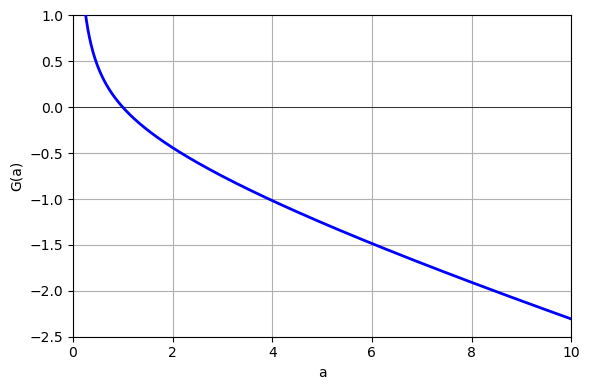

In [14]:
a = np.linspace(1e-3, 10., 1000, endpoint=True)
G = (a + 1.) * np.sum(yi / (a[:,None] * (di + 1) + di), axis=1)
fig3, ax3 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax3.plot(a, G, lw=2., c='b', zorder=3)
ax3.plot([0., 10.], [0., 0.], lw=0.5, c='k', zorder=2)
ax3.set_xlim(0., 10.)
ax3.set_xlabel('a')
ax3.set_ylim(-2.5, 1.)
ax3.set_ylabel('G(a)')
ax3.grid(zorder=1)

Из данного графика видно, что рассматриваемое уравнение имеет корень внутри NF-window: $a \approx 1$. Попробуем применить метод Ньютона:

In [15]:
pG = partial(G_val_grad, yi=yi, di=di)
pcondit = partial(condit, tol=1e-8, Niter=50)
pupdate = partial(update, pF=pG)

a = 4. # Initial estimate

eq, grad = pG(a)
da = eq / grad
carry = (1, a, da, eq)
print(f'Iteration i = 0:\n\t{a = }\n\t{eq = }\n')

while pcondit(carry):
    carry = pupdate(carry)

i, a, _, eq = carry
F = (a * ci[-1] + ci[0]) / (a + 1.)
print(f'Solution of the Rachford-Rice equation: {F = }')

Iteration i = 0:
	a = 4.0
	eq = np.float64(-1.0170217432585626)

Iteration i = 1:
	a = np.float64(-0.04616186013996604)
	eq = np.float64(-2.0693455759349475)

Iteration i = 2:
	a = np.float64(-0.0685150091222449)
	eq = np.float64(-0.4806547410956097)

Iteration i = 3:
	a = np.float64(-0.07664997226823414)
	eq = np.float64(-0.008232200611855804)

Iteration i = 4:
	a = np.float64(-0.07679240622786793)
	eq = np.float64(1.1737896543702413e-06)

Iteration i = 5:
	a = np.float64(-0.07679238592476864)
	eq = np.float64(2.5419165471458324e-14)

Solution of the Rachford-Rice equation: F = np.float64(-583179988.8231626)


Метод Ньютона сошелся к решению, находящемуся за пределами NF-window. Причина – перелет на первой итерации. Таким образом, необходимо доработать представленный алгоритм для повышения его устойчивости. Рассмотрим [теорему Дарбу](http://www.numdam.org/article/NAM_1869_2_8__17_0.pdf), позволяющую определить наличие и отсутствие перелета на итерации:

```{admonition} Теорема
:class: danger
Пусть $x_0$ является начальным приближением уравнения $f \left( x \right) = 0$. Выпуклая функция $f \left( x \right)$ непрерывна и дважды дифференциируема на рассматриваемом интервале. Условием отсутствия перелета при использовании метода Ньютона и начальном приближении $x_0$ является:

$$ f \left( x_0 \right) f'' \left( x_0 \right) > 0. $$

```

Иными словами, необходимо доказать, что если выполняется условие $f \left( x_0 \right) \, f'' \left( x_0 \right) > 0$, то расчетный шаг $h_0 = - \frac{f \left( x_0 \right)}{f' \left( x_0 \right)}$ меньше расстояния $h = x^* - x_0$ от начального приближения $x_0$ до решения уравнения $x^*$.

````{admonition} Доказательство
:class: proof

Для начала отметим, что условие $f \left( x_0 \right) \, f'' \left( x_0 \right) > 0$ эквивалентно тому, что обе функции $f \left( x_0 \right)$ и $f'' \left( x_0 \right)$ имеют один знак в точке $x_0$. Это может быть верно в двух случаях.

Пусть $f \left( x_0 \right) > 0$ и $f'' \left( x_0 \right) > 0$. Тогда имеется выпуклая вниз функция $f \left( x \right)$, которая может иметь два пересечения с осью абсцисс:

```{glue:} glued_fig_1
```

<br>
<br>

Если $f' \left( x \right) > 0$, то $h_0 = x_1 - x_0 < 0$ и $h = x^* - x_0 < 0$. Если же $f' \left( x \right) < 0$, то $h_0 = x_1 - x_0 > 0$ и $h = x^* - x_0 > 0$. Разложим функцию $f \left( x \right)$ в ряд Тейлора вблизи точки $x^*$:

$$ f \left( x^* \right) = 0 \approx f \left( x_0 \right) + \left( x^* - x_0 \right) f' \left( x_0 \right) + \frac{\left( x^* - x_0 \right)^2}{2} f'' \left( x_0 \right). $$

С учетом представленных выше обозначений:

$$ f \left( x_0 \right) + h f' \left( x_0 \right) + \frac{h^2}{2} f'' \left( x_0 \right) = 0. $$

Данное выражение можно преобразовать следующим образом:

$$ h = - \frac{f \left( x_0 \right)}{f' \left( x_0 \right)} - \frac{h^2}{2} \frac{f'' \left( x_0 \right)}{f' \left( x_0 \right)}. $$

На первой итерации метода Ньютона:

$$ x_1 = x_0 - \frac{f \left( x_0 \right)}{f' \left( x_0 \right)}. $$

Тогда

$$ h_0 = - \frac{f \left( x_0 \right)}{f' \left( x_0 \right)}. $$

С учетом этого выражение выше можно записать:

$$ h = h_0 - \frac{h^2}{2} \frac{f'' \left( x_0 \right)}{f' \left( x_0 \right)}. $$

Разделим левую и правую части на $h$ и преобразуем:

$$ 1 - \frac{h_0}{h} = - \frac{h}{2} \frac{f'' \left( x_0 \right)}{f' \left( x_0 \right)}. $$

Таким образом, если $f'' \left( x_0 \right) > 0, \; f' \left( x \right) > 0, \; h < 0$, то $1 - \frac{h_0}{h} > 0$, следовательно $h_0 < h$. Если же $f'' \left( x_0 \right) > 0, \; f' \left( x \right) < 0, \; h > 0$, то $1 - \frac{h_0}{h} > 0$, следовательно $h_0 < h$.

Аналогичным образом доказывается для случая, когда $f \left( x_0 \right) < 0$ и $f'' \left( x_0 \right) < 0$.

````

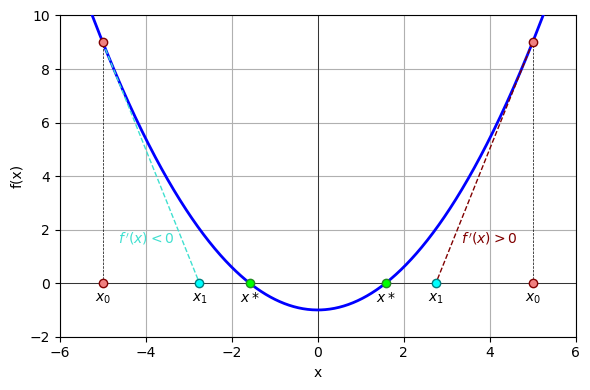

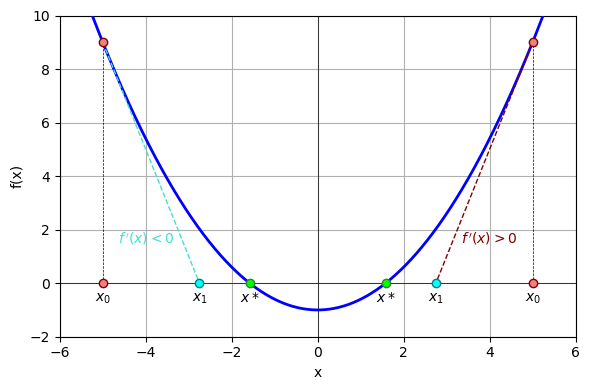

In [16]:
fig_1, ax_1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
xmax = 6.
xmin = -xmax
x = np.linspace(xmin, xmax, 1000, endpoint=True)
a = .4
b = 0.
c = -1.
y = a * x * x + b * x + c
D = np.sqrt(b * b - 4. * a * c)
x1 = (-b + D) / 2. / a
x2 = (-b - D) / 2. / a
ax_1.plot(x, y, lw=2., c='b', label='f(x)', zorder=3)

x0 = 5.
y0 = a * x0 * x0 + b * x0 + c
xp = np.array([x0, (a * x0 * x0 - c) / (2. * a * x0 + b)])
yp = (2. * a * x0 + b) * xp + (c - a * x0 * x0)
ax_1.plot(xp, yp, lw=1., ls='--', c='maroon', label="f'(x)", zorder=4)
ax_1.plot([x0, x0,], [y0, 0.,], 'o', lw=0., ms=6., mfc='lightcoral', mec='maroon', zorder=5)
ax_1.plot([x0, x0], [0., y0], c='k', lw=.5, ls='--', zorder=4)
ax_1.text(x0, -.3, '$x_0$', ha='center', va='top')
ax_1.plot(xp[1], 0., 'o', lw=0., ms=6., mfc='cyan', mec='teal', zorder=5)
ax_1.text(xp[1], -.3, '$x_1$', ha='center', va='top')
ax_1.plot(x1, 0., 'o', lw=0., ms=6., mfc='lime', mec='forestgreen', zorder=5)
ax_1.text(x1, -.3, '$x*$', ha='center', va='top')
ax_1.text(4., 2., r"$f \/ ' (x) > 0$", ha='center', va='top', c='maroon')

x0 = -5.
y0 = a * x0 * x0 + b * x0 + c
xp = np.array([x0, (a * x0 * x0 - c) / (2. * a * x0 + b)])
yp = (2. * a * x0 + b) * xp + (c - a * x0 * x0)
ax_1.plot(xp, yp, lw=1., ls='--', c='turquoise', label="f'(x)", zorder=4)
ax_1.plot([x0, x0,], [y0, 0.,], 'o', lw=0., ms=6., mfc='lightcoral', mec='maroon', zorder=5)
ax_1.plot([x0, x0], [0., y0], c='k', lw=.5, ls='--', zorder=4)
ax_1.text(x0, -.3, '$x_0$', ha='center', va='top')
ax_1.plot(xp[1], 0., 'o', lw=0., ms=6., mfc='cyan', mec='teal', zorder=5)
ax_1.text(xp[1], -.3, '$x_1$', ha='center', va='top')
ax_1.plot(x2, 0., 'o', lw=0., ms=6., mfc='lime', mec='forestgreen', zorder=5)
ax_1.text(x2, -.3, '$x*$', ha='center', va='top')
ax_1.text(-4., 2., r"$f \/ ' (x) < 0$", ha='center', va='top', c='turquoise')

ax_1.plot([xmin, xmax], [0., 0.], lw=.5, c='k', zorder=2)
ax_1.plot([0., 0.], [-2., 10.], lw=.5, c='k', zorder=2)
ax_1.set_xlim(xmin, xmax)
ax_1.set_xlabel('x')
ax_1.set_ylim(-2., 10.)
ax_1.set_ylabel('f(x)')
ax_1.grid(zorder=1)

from myst_nb import glue
glue('glued_fig_1', fig_1)

Таким образом, при $a_0 > a^*$ условие $G \left( a_0 \right) \, G'' \left( a_0 \right) > 0$ не выполняется, поскольку $G \left( a_0 \right) < 0$ и $G'' \left( a_0 \right) > 0$, следовательно, представленный выше алгоритм может иметь перелет на первой итерации и сходиться к корню, находящемуся вне заданного интервала. Для того чтобы гарантированно находить корень в нужном диапазоне, могут применяться модификации метода Ньютона, например, совмещение метода Ньютона и [метода бисекции](https://en.wikipedia.org/wiki/Bisection_method). Однако авторами работы \[[Nichita and Leibovici, 2013](https://doi.org/10.1016/j.fluid.2013.05.030)\] было предложено рассмотреть другую выпуклую функцию, которая имеет тот же корень, что и $G \left( a \right)$:

$$ H \left( a \right) = -a G \left( a \right). $$

Покажем, что функция $H \left( a \right)$ является выпуклой на интервале $a \in \left(0, \, +\infty \right)$. Для этого докажем, что $\frac{\partial^2 H}{\partial a^2} > 0$ на интервале $a \in \left(0, \, +\infty \right)$.

```{admonition} Доказательство
:class: proof

Получим первую частную производную $H \left( a \right)$:

$$ \frac{ \partial H}{\partial a } = - \left( G + a \frac{ \partial G}{\partial a } \right). $$

Вторая частная производная $H \left( a \right)$:

$$ \begin{align}
\frac{ \partial^2 H}{\partial a^2 }
&= - \left( 2 \frac{ \partial G}{\partial a } + a \frac{ \partial^2 G}{\partial a^2 } \right) \\
&= - \left( -2 \sum_{i=1}^{N_c} \frac{y_i}{\left( \left( 1 + d_i \right) a + d_i \right)^2} + 2 a \sum_{i=1}^{N_c} \frac{y_i \left( d_i + 1 \right)}{\left( \left( 1 + d_i \right) a + d_i \right)^3} \right) \\
&= 2 \sum_{i=1}^{N_c} \frac{y_i d_i}{\left( \left( 1 + d_i \right) a + d_i \right)^3} \\
&= 2 \left( \sum_{i=2}^{N_c-1} \frac{y_i}{\left( \left( 1 + d_i \right) a + d_i \right)^2} \frac{1}{\frac{d_i + 1}{d_i} a + 1} + y_{N_c} \right).
\end{align} $$

С учетом ранее доказанного неравенства:

$$ \frac{d_i}{d_i + 1} > 0, \; i = 2 \, \ldots \, N_c - 1, $$

вторая частная производная функции $H \left( a \right) > 0$ для $a \in \left(0, \, +\infty \right)$.

```

Таким образом, функция $H \left( a \right)$ является выпуклой на интервале $a \in \left(0, \, +\infty \right)$. Построим график функции $H \left( a \right)$ для рассматриваемого примера.

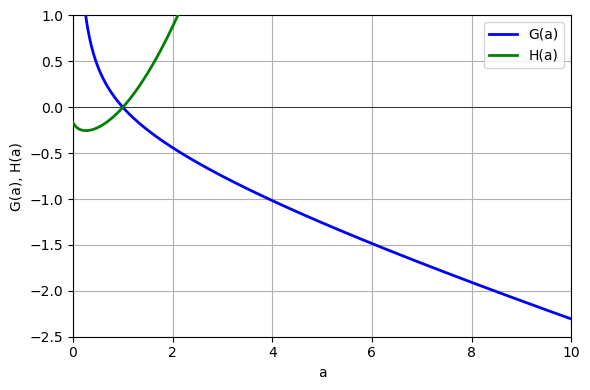

In [17]:
a = np.linspace(1e-3, 10., 1000, endpoint=True)
G = (a + 1.) * np.sum(yi / (a[:,None] * (di + 1) + di), axis=1)
H = -a * G
fig4, ax4 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax4.plot(a, G, lw=2., c='b', zorder=3, label='G(a)')
ax4.plot(a, H, lw=2., c='g', zorder=3, label='H(a)')
ax4.plot([0., 10.], [0., 0.], lw=0.5, c='k', zorder=2)
ax4.set_xlim(0., 10.)
ax4.set_xlabel('a')
ax4.set_ylim(-2.5, 1.)
ax4.set_ylabel('G(a), H(a)')
ax4.legend(loc=1)
ax4.grid(zorder=1)

Таким образом, для функции $H \left( a \right)$ теорема Дарбу $H \left( a_0 \right) \, H'' \left( a_0 \right) > 0$ справедлива для $a_0 > a^*$, и при использовании этой формулировки уравнения Речфорда-Райса при начальном приближении $a_0 > a^*$ перелета не будет. Проверим это на рассматриваемом примере.

Создадим функцию, которая рассчитывает значение и первую производную функции $H \left( a \right)$, и проинициализируем ее:

In [18]:
def H_val_grad(
    a: np.float64,
    yi: npt.NDArray[np.float64],
    di: npt.NDArray[np.float64],
) -> tuple[np.float64, np.float64]:
    denom = 1. / (di + a * (1. + di))
    G = (1. + a) * yi.dot(denom)
    dGda = -1. * yi.dot(denom * denom)
    return -a * G, -G - a * dGda

pH = partial(H_val_grad, yi=yi, di=di)

Проинициализируем функцию `update`:

In [19]:
pupdate = partial(update, pF=pH)

Решим уравнение Речфорда-Райса, используя формулировку в виде $H \left( a \right) = 0$:

In [20]:
a = 4. # Initial estimate

eq, grad = pH(a)
da = eq / grad
carry = (1, a, da, eq)
print(f'Iteration i = 0:\n\t{a = }\n\t{eq = }\n')

while pcondit(carry):
    carry = pupdate(carry)

i, a, _, eq = carry
F = (a * ci[-1] + ci[0]) / (a + 1.)
print(f'Solution of the Rachford-Rice equation: {F = }')

Iteration i = 0:
	a = 4.0
	eq = np.float64(4.068086973034251)

Iteration i = 1:
	a = np.float64(1.9885257440895772)
	eq = np.float64(0.8679133716572004)

Iteration i = 2:
	a = np.float64(1.2228760655119744)
	eq = np.float64(0.14929840426946112)

Iteration i = 3:
	a = np.float64(1.0195014354612744)
	eq = np.float64(0.011896720513545194)

Iteration i = 4:
	a = np.float64(1.0001856947104446)
	eq = np.float64(0.00011218593245642622)

Iteration i = 5:
	a = np.float64(1.0000000421169861)
	eq = np.float64(1.0411409018190242e-08)

Iteration i = 6:
	a = np.float64(1.0000000248843093)
	eq = np.float64(5.551115330329282e-17)

Solution of the Rachford-Rice equation: F = np.float64(-7.656710589033492)


Таким образом, метод Ньютона сошелся на корне, находящимся в нужном диапазоне. Следовательно, для повышения устойчивости численного метода решения уравнения Речфорда-Райса необходимо проверять условие $G \left( a_0 \right) \, ? \, 0$. Если $G \left( a_0 \right) < 0$, то выбирается формулировка $H \left( a \right)$, иначе – формулировка $G \left( a \right)$. Проверка данного условия для начального приближения $a_0$ позволяет повысить устойчивость численного алгоритма решения уравнения Речфорда-Райса. Однако, с точки зрения практической значимости, хороший численный метод отличает не только его устойчивость, но и его эффективность *(rapidness)* – количество затрачиваемых итераций на поиск решения заданной точности. Зачастую повышение эффективности численного метода связывают с поиском наиболее точного начального приближения, для определения которого необходимо минимум вычислений, а также с *линеаризацией* функции, то есть с ее преобразованием к виду, максимально приближенному к линейной зависимости, поскольку для решения линейного уравнения необходима ровно одна ньютоновская итерация.

Для получения выражения для начального приближения рассмотрим следующий вид уравнения Речфорда-Райса, полученный авторами работы \[[Leibovici and Neoschil, 1992](https://doi.org/10.1016/0378-3812(92)85069-K)\]:

$$ L \left( F \right) = \left( F - c_1 \right) \left( c_{N_c} - F \right) \sum_{i=1}^{N_c} \frac{y_i}{F - c_i} = 0. $$

Функция $L \left( F \right)$ не является монотонной и не является выпуклой на интервале NF-window $F \in \left( с_1, \, с_{N_c} \right)$, однако в большинстве случаев ее график близок к линейному. Построим график этой функции для рассматриваемого примера.

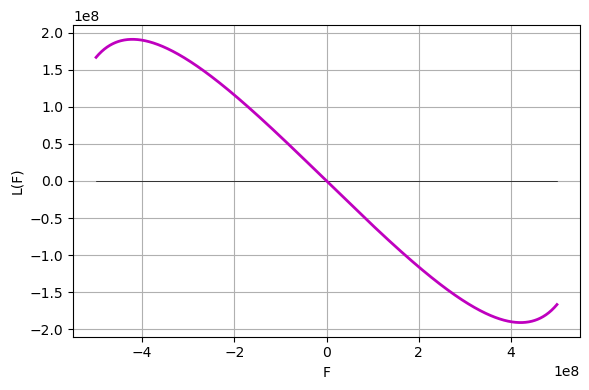

In [21]:
F = np.linspace(ci[0] + 1e-3, ci[-1] - 1e-3, 1000, endpoint=True)
L = (F - ci[0]) * (ci[-1] - F) * np.sum(yi / (F[:,None] - ci), axis=1)
fig5, ax5 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax5.plot(F, L, lw=2., c='m', zorder=3)
ax5.plot([ci[0], ci[-1]], [0., 0.], lw=0.5, c='k', zorder=2)
ax5.set_xlabel('F')
ax5.set_ylabel('L(F)')
ax5.grid(zorder=1)

Преобразуем выражение для функции $L \left( F \right)$ к следующему виду:

$$ \begin{align}
L \left( F \right)
&= \left( F - c_1 \right) \left( c_{N_c} - F \right) \sum_{i=1}^{N_c} \frac{y_i}{F - c_i} \\
&= y_1 \left( c_{N_c} - F \right) + \left( F - c_1 \right) \left( c_{N_c} - F \right) \sum_{i=2}^{N_c-1} \frac{y_i}{F - c_i} - y_{N_c} \left( F - c_1 \right).
\end{align} $$

В точке $F = c_1$ значение функции $L \left( F \right)$:

$$ L \left( c_1 \right) = y_1 \left( c_{N_c} - c_1 \right). $$

В точке $F = c_{N_c}$ значение функции $L \left( F \right)$:

$$ L \left( c_{N_c} \right) = - y_{N_c} \left( c_{N_c} - c_1 \right). $$

Уравнение прямой, проходящей через эти две точки, записывается следующим образом:

$$ l \left( F \right) = - \left( y_1 + y_{N_c} \right) F + \left( y_1 c_{N_c} + y_{N_c} c_1 \right). $$

Эта прямая пересекает ось абсцисс в точке:

$$ F_0 = \frac{y_1 c_{N_c} + y_{N_c} c_1}{y_1 + y_{N_c}}. $$

Или относительно переменной $a$:

$$ a_0 = \frac{y_1}{y_{N_c}}. $$

Согласно \[[Nichita and Leibovici, 2017](https://doi.org/10.1016/j.fluid.2017.08.020)\], это выражение позволяет получить наиболее точное начальное приближение без дополнительных вычислений (то есть используя только известные величины).

Рассмотрим следующую функцию и построим ее график для рассматриваемого примера:

$$ D \left( a \right) = \frac{a}{a + 1} G \left( a \right) = - \frac{1}{a + 1} H \left( a \right) = y_1 + a \sum_{i = 2}^{N_c - 1} \frac{y_i}{d_i + a \left( 1 + d_i \right)} - y_{N_c} a. $$

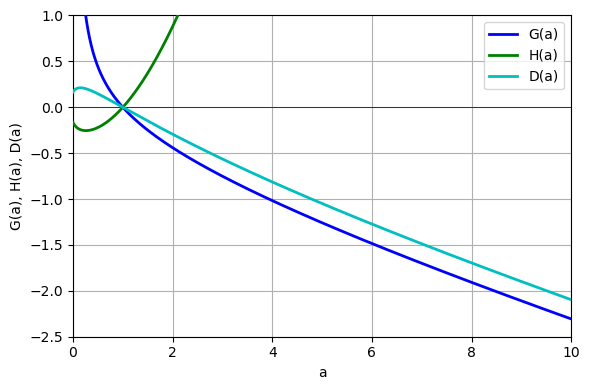

In [22]:
a = np.linspace(1e-3, 10., 1000, endpoint=True)
G = (a + 1.) * np.sum(yi / (a[:,None] * (di + 1) + di), axis=1)
H = -a * G
D = a / (a + 1.) * G
fig6, ax6 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax6.plot(a, G, lw=2., c='b', zorder=3, label='G(a)')
ax6.plot(a, H, lw=2., c='g', zorder=3, label='H(a)')
ax6.plot(a, D, lw=2., c='c', zorder=3, label='D(a)')
ax6.plot([0., 10.], [0., 0.], lw=0.5, c='k', zorder=2)
ax6.set_xlabel('a')
ax6.set_xlim(0., 10.)
ax6.set_ylabel('G(a), H(a), D(a)')
ax6.set_ylim(-2.5, 1.)
ax6.legend(loc=1)
ax6.grid(zorder=1)

Из данного графика видно, что функция $D \left( a \right)$ близка к прямой, однако она не является выпуклой и не гарантирует сходимость метода Ньютона к корню в нужном интервале. Тем не менее, можно использовать преимущество почти линейного вида функции $D \left( a \right)$, проверяя на каждой итерации соответствие текущего приближения нужному интервалу NF-window. Если приближение на $\left(k+1\right)$-й итерации решения уравнения $D \left( a \right) = 0$ выходит за NF-window, то есть если $a_{k+1} < 0$, то необходимо переключиться на решение уравнения $G \left( a \right) = 0$ или $H \left( a \right) = 0$ и пересчитать значение $a_{k+1}$. Покажем, как это можно сделать без дополнительных вычислений функции $G \left( a \right)$ или $H \left( a \right)$ и их производных.

Допустим, на $\left(k+1\right)$-й ньютоновской итерации решения уравнения $D \left( a \right) = 0$ приближение $a^D_{k+1}$ получилось отрицательным. То есть

$$ a^D_{k+1} = a_k - h < 0, $$

где $h = \frac{D}{D'}$, $D = D \left( a_k \right)$ и $D' = \frac{\partial D \left(a \right)}{\partial a} \bigg|_{a_k}$. И допустим, $D \left( a_k \right) > 0$, то есть $a_k < a^*$. В этом случае нам необходимо переключиться на решение уравнения $G \left( a \right) = 0$:

$$ a^G_{k+1} = a_k - \frac{G}{G'}, $$

где $G = G \left( a_k \right)$ и $G' = \frac{\partial G \left(a \right)}{\partial a} \bigg|_{a_k}$. С учетом

$$ G \left( a \right) = \frac{a + 1}{a} D \left( a \right) $$

выразим частную производную функции $G \left( a \right)$ через частную производную функции $D \left( a \right)$:

$$ \begin{align}
\frac{\partial G \left(a \right)}{\partial a}
&= D \left( a \right) \frac{\partial}{\partial a} \left( \frac{a + 1}{a} \right) + \frac{a + 1}{a} \frac{\partial D \left(a \right)}{\partial a} \\
&= \frac{a + 1}{a} \frac{\partial D \left(a \right)}{\partial a} - \frac{D \left( a \right)}{a^2} \\
&= \frac{a + 1}{a} \left( \frac{\partial D \left(a \right)}{\partial a} - \frac{D \left( a \right)}{a \left( a + 1 \right)} \right)
\end{align} $$

С учетом введенных выше обозначений в точке $a_k$ значение производной $\frac{\partial G \left(a \right)}{\partial a}$:

$$ \frac{\partial G \left(a \right)}{\partial a} \bigg|_{a_k} = G' = \frac{a_k + 1}{a_k} \left( D' - \frac{D}{a_k \left( a_k + 1 \right)} \right). $$

Значение самой функции $G \left(a \right)$ в точке $a_k$:

$$ G \left(a_k \right) = G = \frac{a_k + 1}{a_k} D. $$

Тогда преобразуем выражение для $a^G_{k+1}$ следующим образом:

$$ \begin{align}
a^G_{k+1}
&= a_k - \frac{G}{G'} \\
&= a_k - h + h - \frac{G}{G'} \\
&= a^D_{k+1} + h - \frac{G}{G'} \\
&= a^D_{k+1} + h - \frac{\frac{a_k + 1}{a_k} D}{\frac{a_k + 1}{a_k} \left( D' - \frac{D}{a_k \left( a_k + 1 \right)} \right)} \\
&= a^D_{k+1} + h - \frac{D}{D' - \frac{D}{a_k \left( a_k + 1 \right)}} \\
&= a^D_{k+1} + h - \frac{h}{1 - \frac{h}{a_k \left( a_k + 1 \right)}} \\
&= a^D_{k+1} + h - \frac{h a_k \left( a_k + 1 \right)}{a_k \left( a_k + 1 \right) - h} \\
&= a^D_{k+1} + \frac{h^2}{h - a_k \left( a_k + 1 \right)}.
\end{align} $$

Таким образом, значение приближения на $\left(k+1\right)$-й итерации решения уравнения $G \left( a \right) = 0$ может быть получено путем преобразования приближения на $\left(k+1\right)$-й итерации решения уравнения $D \left( a \right) = 0$ без дополнительных вычислений функции $G \left( a \right)$ и ее производной. Аналогичная связь может быть получена для приближений на $\left(k+1\right)$-й итерациях решений уравнений $D \left( a \right) = 0$ и $H \left( a \right) = 0$:

$$ a_{k+1}^H = a_{k+1}^D + \frac{h^2}{h + a_k + 1}. $$

Итак, можно сформулировать численный алгоритм решения уравнения Речфорда-Райса \[[Nichita and Leibovici, 2014](https://doi.org/10.1016/j.compchemeng.2014.10.006)\], гарантирующий сходимость к корню в нужном интервале и являющийся эффективным (использующий преимущество линеаризации):

```{eval-rst}
.. role:: comment
    :class: comment
```

```{admonition} Алгоритм. Решение уравнения Речфорда-Райса для двухфазной системы
:class: algorithm

**Дано:** Отсортированный по убыванию вектор констант фазового равновесия $\mathbf{k}$; вектор компонентного состава системы $\mathbf{y}$, соответствующий вектору констант фазового равновесия; максимальное число итераций $N_{iter}$; точность решения уравнения $\epsilon$.

**Определить:** Корень уравнения Речфорда-Райса, соответствующий NF-window.

**Псевдокод:**  
$c_i := 1 \, / \left( 1 - k_i \right), \; i = 1 \, \ldots \, N_c$  
$d_i := \left( c_1 - c_i \right) \, / \left( c_{N_c} - c_1 \right), \; i = 2 \, \ldots \, N_c - 1$  
$a := y_1 \, / \, y_{N_c}$ {comment}`# Начальное приближение`  
**def**$\; fD \left( a, \, \mathbf{y}, \, \mathbf{d} \right)$ {comment}`# Функция D(a)`  
&emsp;$D := y_1 + a \sum_{i=2}^{N_c-1} y_i \, / \left( d_i + a \left( d_i + 1 \right) \right) - y_{N_c} a$ {comment}`# Значение функции в точке a`  
&emsp;$D' := \sum_{i=2}^{N_c-1} y_i d_i \, / \left( d_i + a \left( d_i + 1 \right) \right)^2 - y_{N_c}$  {comment}`# Значение производной функции в точке a`  
&emsp;**return** $D, \; D'$  
$\left( D, \; D' \right) := fD \left( a, \, \mathbf{y}, \, \mathbf{d} \right)$ {comment}`# Расчет значения функции D(a) и ее градиента для начального приближения`  
$h := D \, / \, D'$ {comment}`# Длина шага`  
$i := 1$ {comment}`# Номер итерации`  
**while** $\left| D \right| > \epsilon$ **and** $i < N_{iter}$ **do**  
&emsp;$a_{i+1} := a - h$ {comment}`# Расчет нового приближения для (i+1)-й итерации`  
&emsp;**if** $a_{i+1} < 0$ **then** {comment}`# Если новое приближение находится вне NF-window...`  
&emsp;&emsp;**if** $D > 0$ **then**  {comment}`# Выбор между переключением на функции G(a) или H(a)`  
&emsp;&emsp;&emsp;$a_{i+1} := a_{i+1} + h^2 / \left( h - a \left( a + 1 \right) \right)$  {comment}`# Итерация в формулировке G(a)`  
&emsp;&emsp;**else**  
&emsp;&emsp;&emsp;$a_{i+1} := a_{i+1} + h^2 / \left( h + a + 1 \right)$ {comment}`# Итерация в формулировке H(a)`  
&emsp;&emsp;**end if**  
&emsp;**end if**  
&emsp;$\left( D, \; D' \right) := fD \left( a_{i+1}, \, \mathbf{y}, \, \mathbf{d} \right)$ {comment}`# Расчет значения функции D(a) и ее градиента для нового приближения`  
&emsp;$h := D / D'$ {comment}`# Обновление шага итерации`  
&emsp;$i := i + 1$ {comment}`# Обновление номера итерации`  
**end while**  
```

Пример реализации данного алгоритма представлен [здесь](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/rr.py). Рассмотрим несколько примеров решения уравнения Речфорда-Райса для различных исходных компонентных составов и констант фазового равновесия. Более детальный разбор этих примеров представлен в работе \[[Nichita and Leibovici, 2013](https://doi.org/10.1016/j.fluid.2013.05.030)\].

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
yi = np.array([0.770, 0.200, 0.010, 0.010, 0.005, 0.005])
kvi = np.array([1.00003, 1.00002, 1.00001, 0.99999, 0.99998, 0.99997])
```

Необходимо найти корень уравнения Речфорда-Райса, соответствующий NF-window.

````

````{dropdown} Решение

Сначала рассчитаем значения $c_i, \; i = 1 \, \ldots \, N_c,$ и $d_i, \; i = 2 \, \ldots \, N_c - 1$:

``` python
ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])
```

Создадим функцию, позволяющую рассчитать значение и производную функции $D \left( a \right)$ и проинициализируем ее исходными данными:

``` python
def fD(
    a: np.float64,
    yi: npt.NDArray[np.float64],
    di: npt.NDArray[np.float64],
) -> tuple[np.float64, np.float64]:
    denom = 1. / (di * (a + 1.) + a)
    return (
        yi[0] + a * yi[1:-1].dot(denom) - yi[-1] * a,
        (yi[1:-1] * di).dot(denom * denom) - yi[-1],
    )

pD = partial(fD, yi=yi, di=di)
```

Затем создадим функцию, которая принимает на вход кортеж из номера итерации `i`, переменной `a`, шага итерации `h` и значения функции $D \left( a \right)$ `D`, а также точность решения уравнения `tol` и максимальное количество итераций `Niter`, и возвращает необходимость выполнения следующей итерации:

``` python
def condit(
    carry: tuple[int, np.float64, np.float64, np.float64],
    tol: np.float64,
    Niter: int,
) -> bool:
    i, a, _, D = carry
    return (i < Niter) & (np.abs(D) > tol)

pcondit = partial(condit, tol=np.float64(1e-10), Niter=50)
```

Далее создадим функцию, которая принимает на вход кортеж с результатами предыдущей итерации и обновляет их значениями для новой итерации:

``` python
def update(
    carry: tuple[int, np.float64, np.float64, np.float64],
    pD: Callable[[np.float64], tuple[np.float64, np.float64]],
) -> tuple[int, np.float64, np.float64, np.float64]:
    i, a_, h_, D_ = carry
    print(f'\nIteration #{i}:')
    a = a_ - h_
    if a < 0.:
        print(f'\tThe value of a becomes less than zero ({a = })')
        if D_ > 0.:
            print('\tUse G(a) formulation to correct step size')
            a += h_ * h_ / (h_ - a_ * (a_ + 1.))
        else:
            print('\tUse H(a) formulation to correct step size')
            a += h_ * h_ / (h_ + a_ + 1.)
    D, dDda = pD(a)
    print(f'\t{a = }\n\t{D = }')
    return i + 1, a, D / dDda, D

pupdate = partial(update, pD=pD)
```

Зададим начальное приближение и рассчитаем значения функции $D \left( a \right)$ и ее производной в точке с начальным приближением:

``` python
a = yi[0] / yi[-1]
D, dDda = pD(a)
```

Решим уравнение Речфорда-Райса методом Ньютона:

``` python
print(f'Iteration #0:\n\t{a = }\n\t{D = }')
carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry = pupdate(carry)
```

```{glue:} glued_out1
```

Тогда мольная доля нереференсной фазы:

``` python
a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)
print(f'{F = }')
```

```{glue:} glued_out2
```

````

In [23]:
yi = np.array([0.770, 0.200, 0.010, 0.010, 0.005, 0.005])
kvi = np.array([1.00003, 1.00002, 1.00001, 0.99999, 0.99998, 0.99997])

ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

def fD(
    a: np.float64,
    yi: npt.NDArray[np.float64],
    di: npt.NDArray[np.float64],
) -> tuple[np.float64, np.float64]:
    denom = 1. / (di * (a + 1.) + a)
    return (
        yi[0] + a * yi[1:-1].dot(denom) - yi[-1] * a,
        (yi[1:-1] * di).dot(denom * denom) - yi[-1],
    )

pD = partial(fD, yi=yi, di=di)

def condit(
    carry: tuple[int, np.float64, np.float64, np.float64],
    tol: np.float64,
    Niter: int,
) -> bool:
    i, a, _, D = carry
    return (i < Niter) & (np.abs(D) > tol)

pcondit = partial(condit, tol=np.float64(1e-10), Niter=50)

def update(
    carry: tuple[int, np.float64, np.float64, np.float64],
    pD: Callable[[np.float64], tuple[np.float64, np.float64]],
) -> tuple[tuple[int, np.float64, np.float64, np.float64], str]:
    i, a_, h_, D_ = carry
    out = f'\n\nIteration #{i}:'
    a = a_ - h_
    if a < 0.:
        out += f'\n\tThe value of a becomes less than zero ({a = })'
        if D_ > 0.:
            out += '\n\tUse G(a) formulation to correct step size'
            a += h_ * h_ / (h_ - a_ * (a_ + 1.))
        else:
            out += '\n\tUse H(a) formulation to correct step size'
            a += h_ * h_ / (h_ + a_ + 1.)
    D, dDda = pD(a)
    out += f'\n\t{a = }\n\t{D = }'
    return (i + 1, a, D / dDda, D), out

pupdate = partial(update, pD=pD)

a = yi[0] / yi[-1]
D, dDda = pD(a)

out1 = f'Iteration #0:\n\t{a = }\n\t{D = }'

carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry, out = pupdate(carry)
    out1 += out

a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)

out2 = f'{F = }'

class MultilineText(object):
    def __init__(self, text):
        self.text = text
        self.template = """
<div class="output text_plain highlight-myst-ansi notranslate"><div class="highlight"><pre id="codecell20" tabindex="0"><span></span>{}
</pre><button class="copybtn o-tooltip--left" data-tooltip="Copy" data-clipboard-target="#codecell20">
      <svg xmlns="http://www.w3.org/2000/svg" class="icon icon-tabler icon-tabler-copy" width="44" height="44" viewBox="0 0 24 24" stroke-width="1.5" stroke="#000000" fill="none" stroke-linecap="round" stroke-linejoin="round">
  <title>Copy to clipboard</title>
  <path stroke="none" d="M0 0h24v24H0z" fill="none"></path>
  <rect x="8" y="8" width="12" height="12" rx="2"></rect>
  <path d="M16 8v-2a2 2 0 0 0 -2 -2h-8a2 2 0 0 0 -2 2v8a2 2 0 0 0 2 2h2"></path>
</svg>
    </button></div>
</div>
"""
    def _repr_html_(self):
        return self.template.format(self.text.replace('\n', '<br>'))

glue('glued_out1', MultilineText(out1))
glue('glued_out2', MultilineText(out2))

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
yi = np.array([0.44, 0.55, 3.88E-03, 2.99E-03, 2.36E-03, 1.95E-03])
kvi = np.array([161.59, 6.90, 0.15, 1.28E-03, 5.86E-06, 2.32E-08])
```

Необходимо найти корень уравнения Речфорда-Райса, соответствующий NF-window.

````

````{dropdown} Решение

Рассчитаем значения $c_i, \; i = 1 \, \ldots \, N_c,$ и $d_i, \; i = 2 \, \ldots \, N_c - 1$:

``` python
ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])
```

Проинициализируем функцию $D \left( a \right)$:

``` python
pD = partial(fD, yi=yi, di=di)
```

Проинициализируем функцию `update`:

``` python
pupdate = partial(update, pD=pD)
```

Зададим начальное приближение и рассчитаем значения функции $D \left( a \right)$ и ее производной в точке с начальным приближением:

``` python
a = yi[0] / yi[-1]
D, dDda = pD(a)
```

Решим уравнение Речфорда-Райса методом Ньютона:

``` python
print(f'Iteration #0:\n\t{a = }\n\t{D = }')
carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry = pupdate(carry)
```

```{glue:} glued_out3
```

Тогда мольная доля нереференсной фазы:

``` python
a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)
print(f'{F = }')
```

```{glue:} glued_out4
```

````

In [24]:
yi = np.array([0.44, 0.55, 3.88E-03, 2.99E-03, 2.36E-03, 1.95E-03])
kvi = np.array([161.59, 6.90, 0.15, 1.28E-03, 5.86E-06, 2.32E-08])

ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

a = yi[0] / yi[-1]
D, dDda = pD(a)

out3 = f'Iteration #0:\n\t{a = }\n\t{D = }'

carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry, out = pupdate(carry)
    out3 += out

a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)

out4 = f'{F = }'

glue('glued_out3', MultilineText(out3))
glue('glued_out4', MultilineText(out4))

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
eps = 1e-9
kvi = 1. + np.array([2. * eps, 1.5 * eps, eps, -eps, -1.5 * eps, -2. * eps])
yi = np.full_like(kvi, 1. / 6.)
```

Необходимо найти корень уравнения Речфорда-Райса, соответствующий NF-window.

````

````{dropdown} Решение

Данный пример подробно разбирался выше, однако покажем, как изменилось количество итераций для этого примера при использовнии линеаризованной функции $D \left( a \right)$. Рассчитаем значения $c_i, \; i = 1 \, \ldots \, N_c,$ и $d_i, \; i = 2 \, \ldots \, N_c - 1$:

``` python
ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

pcondit = partial(condit, tol=np.float64(1e-12), Niter=50)

a = yi[0] / yi[-1]
D, dDda = pD(a)

print(f'Iteration #0:\n\t{a = }\n\t{D = }')
carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry = pupdate(carry)
```

```{glue:} glued_out5
```

Мольная доля нереференсной фазы:

``` python
a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)
print(f'{F = }')
```

```{glue:} glued_out6
```

````

In [25]:
eps = 1e-9
kvi = 1. + np.array([2. * eps, 1.5 * eps, eps, -eps, -1.5 * eps, -2. * eps])
yi = np.full_like(kvi, 1. / 6.)

ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

pcondit = partial(condit, tol=np.float64(1e-12), Niter=50)

a = yi[0] / yi[-1]
D, dDda = pD(a)

out5 = f'Iteration #0:\n\t{a = }\n\t{D = }'

carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry, out = pupdate(carry)
    out5 += out

a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)

out6 = f'{F = }'

glue('glued_out5', MultilineText(out5))
glue('glued_out6', MultilineText(out6))

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
yi = np.array([0.8097, 0.0566, 0.0306, 0.0457, 0.0330, 0.0244])
kvi = np.array([1.000065, 0.999922, 0.999828, 0.999650, 0.999490, 0.999282])
```

Необходимо найти корень уравнения Речфорда-Райса, соответствующий NF-window.

````

````{dropdown} Решение

``` python
ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

pcondit = partial(condit, tol=np.float64(1e-10), Niter=50)

a = yi[0] / yi[-1]
D, dDda = pD(a)

print(f'Iteration #0:\n\t{a = }\n\t{D = }')
carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry = pupdate(carry)
```

```{glue:} glued_out7
```

Мольная доля нереференсной фазы:

``` python
a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)
print(f'{F = }')
```

```{glue:} glued_out8
```

````

In [26]:
yi = np.array([0.8097, 0.0566, 0.0306, 0.0457, 0.0330, 0.0244])
kvi = np.array([1.000065, 0.999922, 0.999828, 0.999650, 0.999490, 0.999282])

ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

pcondit = partial(condit, tol=np.float64(1e-10), Niter=50)

a = yi[0] / yi[-1]
D, dDda = pD(a)

out7 = f'Iteration #0:\n\t{a = }\n\t{D = }'

carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry, out = pupdate(carry)
    out7 += out

a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)

out8 = f'{F = }'

glue('glued_out7', MultilineText(out7))
glue('glued_out8', MultilineText(out8))

````{admonition} Пример
:class: exercise

Пусть мольные доли компонентов и их константы фазового равновесия заданы следующим образом.

``` python
yi = np.array([
    0.1789202106,
    0.0041006011,
    0.7815241261,
    0.0164691242,
    0.0189859122,
    0.0000000257,
])
kvi = np.array([
    445.995819899,
    441.311360487,
    411.625356748,
    339.586063803,
    29.7661058122,
    0.00596602417,
])
```

Необходимо найти корень уравнения Речфорда-Райса, соответствующий NF-window.

````

````{dropdown} Решение

``` python
ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

a = yi[0] / yi[-1]
D, dDda = pD(a)

print(f'Iteration #0:\n\t{a = }\n\t{D = }')
carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry = pupdate(carry)
```

```{glue:} glued_out9
```

Мольная доля нереференсной фазы:

``` python
a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)
print(f'{F = }')
```

```{glue:} glued_out10
```

````

In [27]:
yi = np.array([0.1789202106, 0.0041006011, 0.7815241261, 0.0164691242, 0.0189859122, 0.0000000257])
kvi = np.array([445.995819899, 441.311360487, 411.625356748, 339.586063803, 29.7661058122, 0.00596602417])

ci = 1. / (1. - kvi)
di = (ci[0] - ci[1:-1]) / (ci[-1] - ci[0])

pD = partial(fD, yi=yi, di=di)

pupdate = partial(update, pD=pD)

a = yi[0] / yi[-1]
D, dDda = pD(a)

out9 = f'Iteration #0:\n\t{a = }\n\t{D = }'

carry = (1, a, D / dDda, D)
while pcondit(carry):
    carry, out = pupdate(carry)
    out9 += out

a = carry[1]
F = (ci[0] + a * ci[-1]) / (1. + a)

out10 = f'{F = }'

glue('glued_out9', MultilineText(out9))
glue('glued_out10', MultilineText(out10))

Таким образом, в данном разделе представлен подход к решению уравнения Речфорда-Райса для двухфазных систем. В [следующем разделе](SEC-4-RR-NP.md) речь пойдет про многофазные системы с количеством фаз три и более.